In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("preplacementdata.csv")

In [3]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [4]:
import seaborn as sns

C:\Users\RRDIL\AppData\Local\Temp\ipykernel_19192\2590864738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

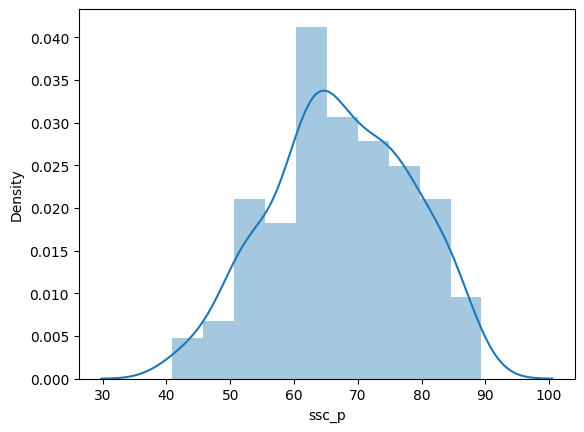

In [5]:
sns.distplot(dataset["ssc_p"])

In [7]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
   
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
     #first create distplot and then give the dataset we have to create curve so kde(kernel density function) is True and 
     #we put the curve colour is blue and histogram colour is green.
    
    pyplot.axvline(startrange,color='Red')
    # py plot axis(ax) vertical line in start range ,the colour of the line is "Red"
  
    pyplot.axvline(endrange,color='Red')
    # py plot axis(ax) vertical line in end range ,the colour of the line is "Red"
   
    #generate a sample
    sample=dataset
   
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f,Standard Deviation=%.3f' % (sample_mean,sample_std))
   
    #define the distribution
    dist=norm(sample_mean,sample_std)
    #normal distribution have inbuild function we give sample_mean,sample_standard deviation so it create the distribution function
  
    #sample probabilities for a range of outcomes
    values=[value for value in range(startrange, endrange)]
    #single line for loop
    
    probabilities=[dist.pdf(value) for value in values]
    #dist.pdf pass the value  create the probability
    
    prob=sum(probabilities)
    #summation the probabilities
    
    print("The area between range({},{}:{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

Mean=67.303,Standard Deviation=10.827
The area between range(60,70:0.3449514151280293


C:\Users\RRDIL\AppData\Local\Temp\ipykernel_19192\3135787118.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


0.3449514151280293

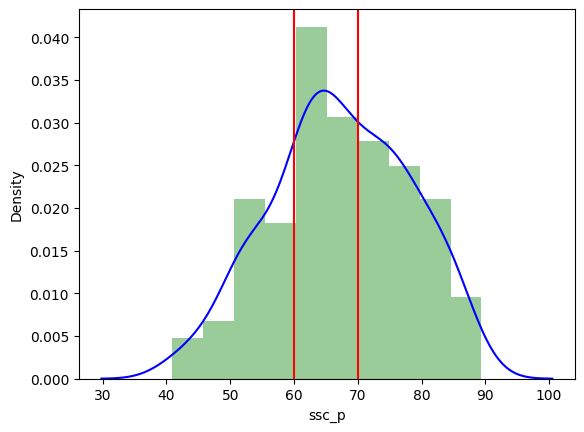

In [9]:
get_pdf_probability(dataset["ssc_p"],60,70)

In [10]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['ssc_p'])
ecdf(78)

0.827906976744186

In [11]:
#!pip install statsmodels

In [12]:
def stdNBgraph(dataset):
 #converted to standard normal distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]
     #we pass the input dataset and the converted as list .
   
    z_score=[((j-mean)/std) for j in values]
    #calculate the zscore value from inliner for loop .
    
    sns.displot(z_score,kde=True)
    #plot the standard normal distribution graph.
    
    sum(z_score)/len(z_score)
    #z_score.std()
    

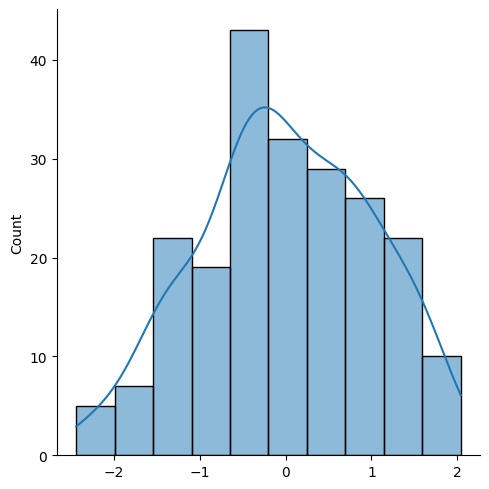

In [13]:
stdNBgraph(dataset["ssc_p"])